In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving glass.xlsx to glass.xlsx


In [3]:
glass_data = pd.read_excel('glass.xlsx')
glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
# Check for missing values
missing_values = glass_data.isnull().sum()
print(missing_values)

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


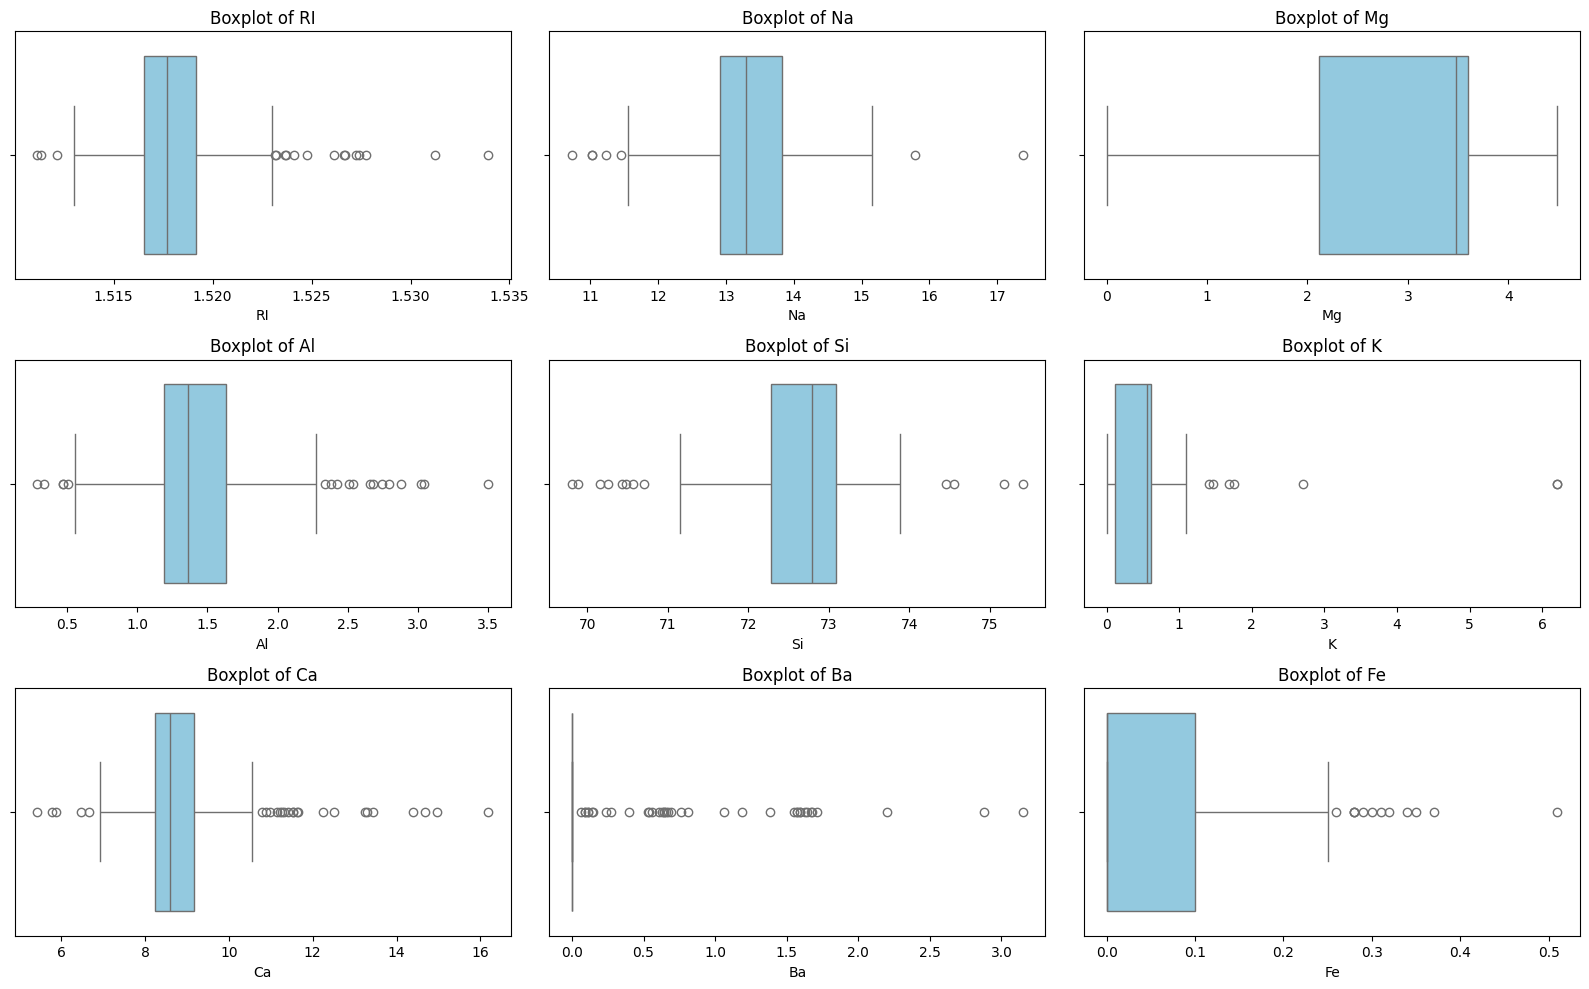

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 10))

# Plot boxplots for all numerical columns except the 'Type' column (target)
for i, column in enumerate(glass_data.columns[:-1], 1):
    plt.subplot(3, 3, i)  # create 3x3 subplots
    sns.boxplot(data=glass_data, x=column, color='skyblue')
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

<ipython-input-8-242bfa7425c4>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


<Figure size 1600x1200 with 0 Axes>

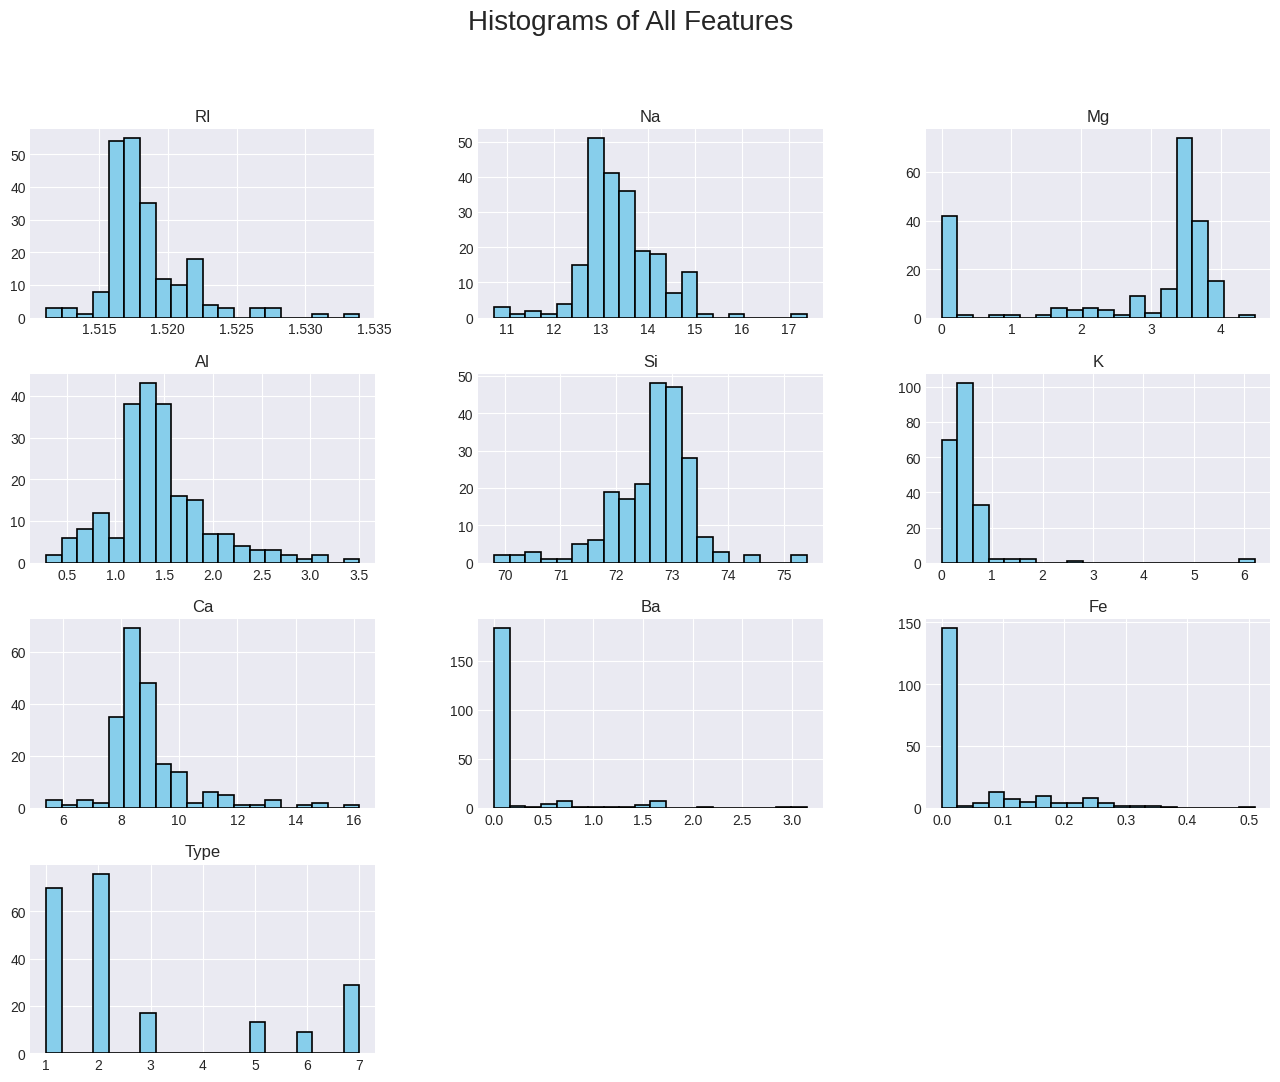

In [8]:
plt.style.use('seaborn-darkgrid')
# Histograms for each numerical feature to visualize the distribution
def plot_histograms(data):
    plt.figure(figsize=(16, 12))
    data.hist(bins=20, color='skyblue', edgecolor='black', linewidth=1.2, figsize=(16, 12))
    plt.suptitle("Histograms of All Features", fontsize=20)
    plt.show()
plot_histograms(glass_data)

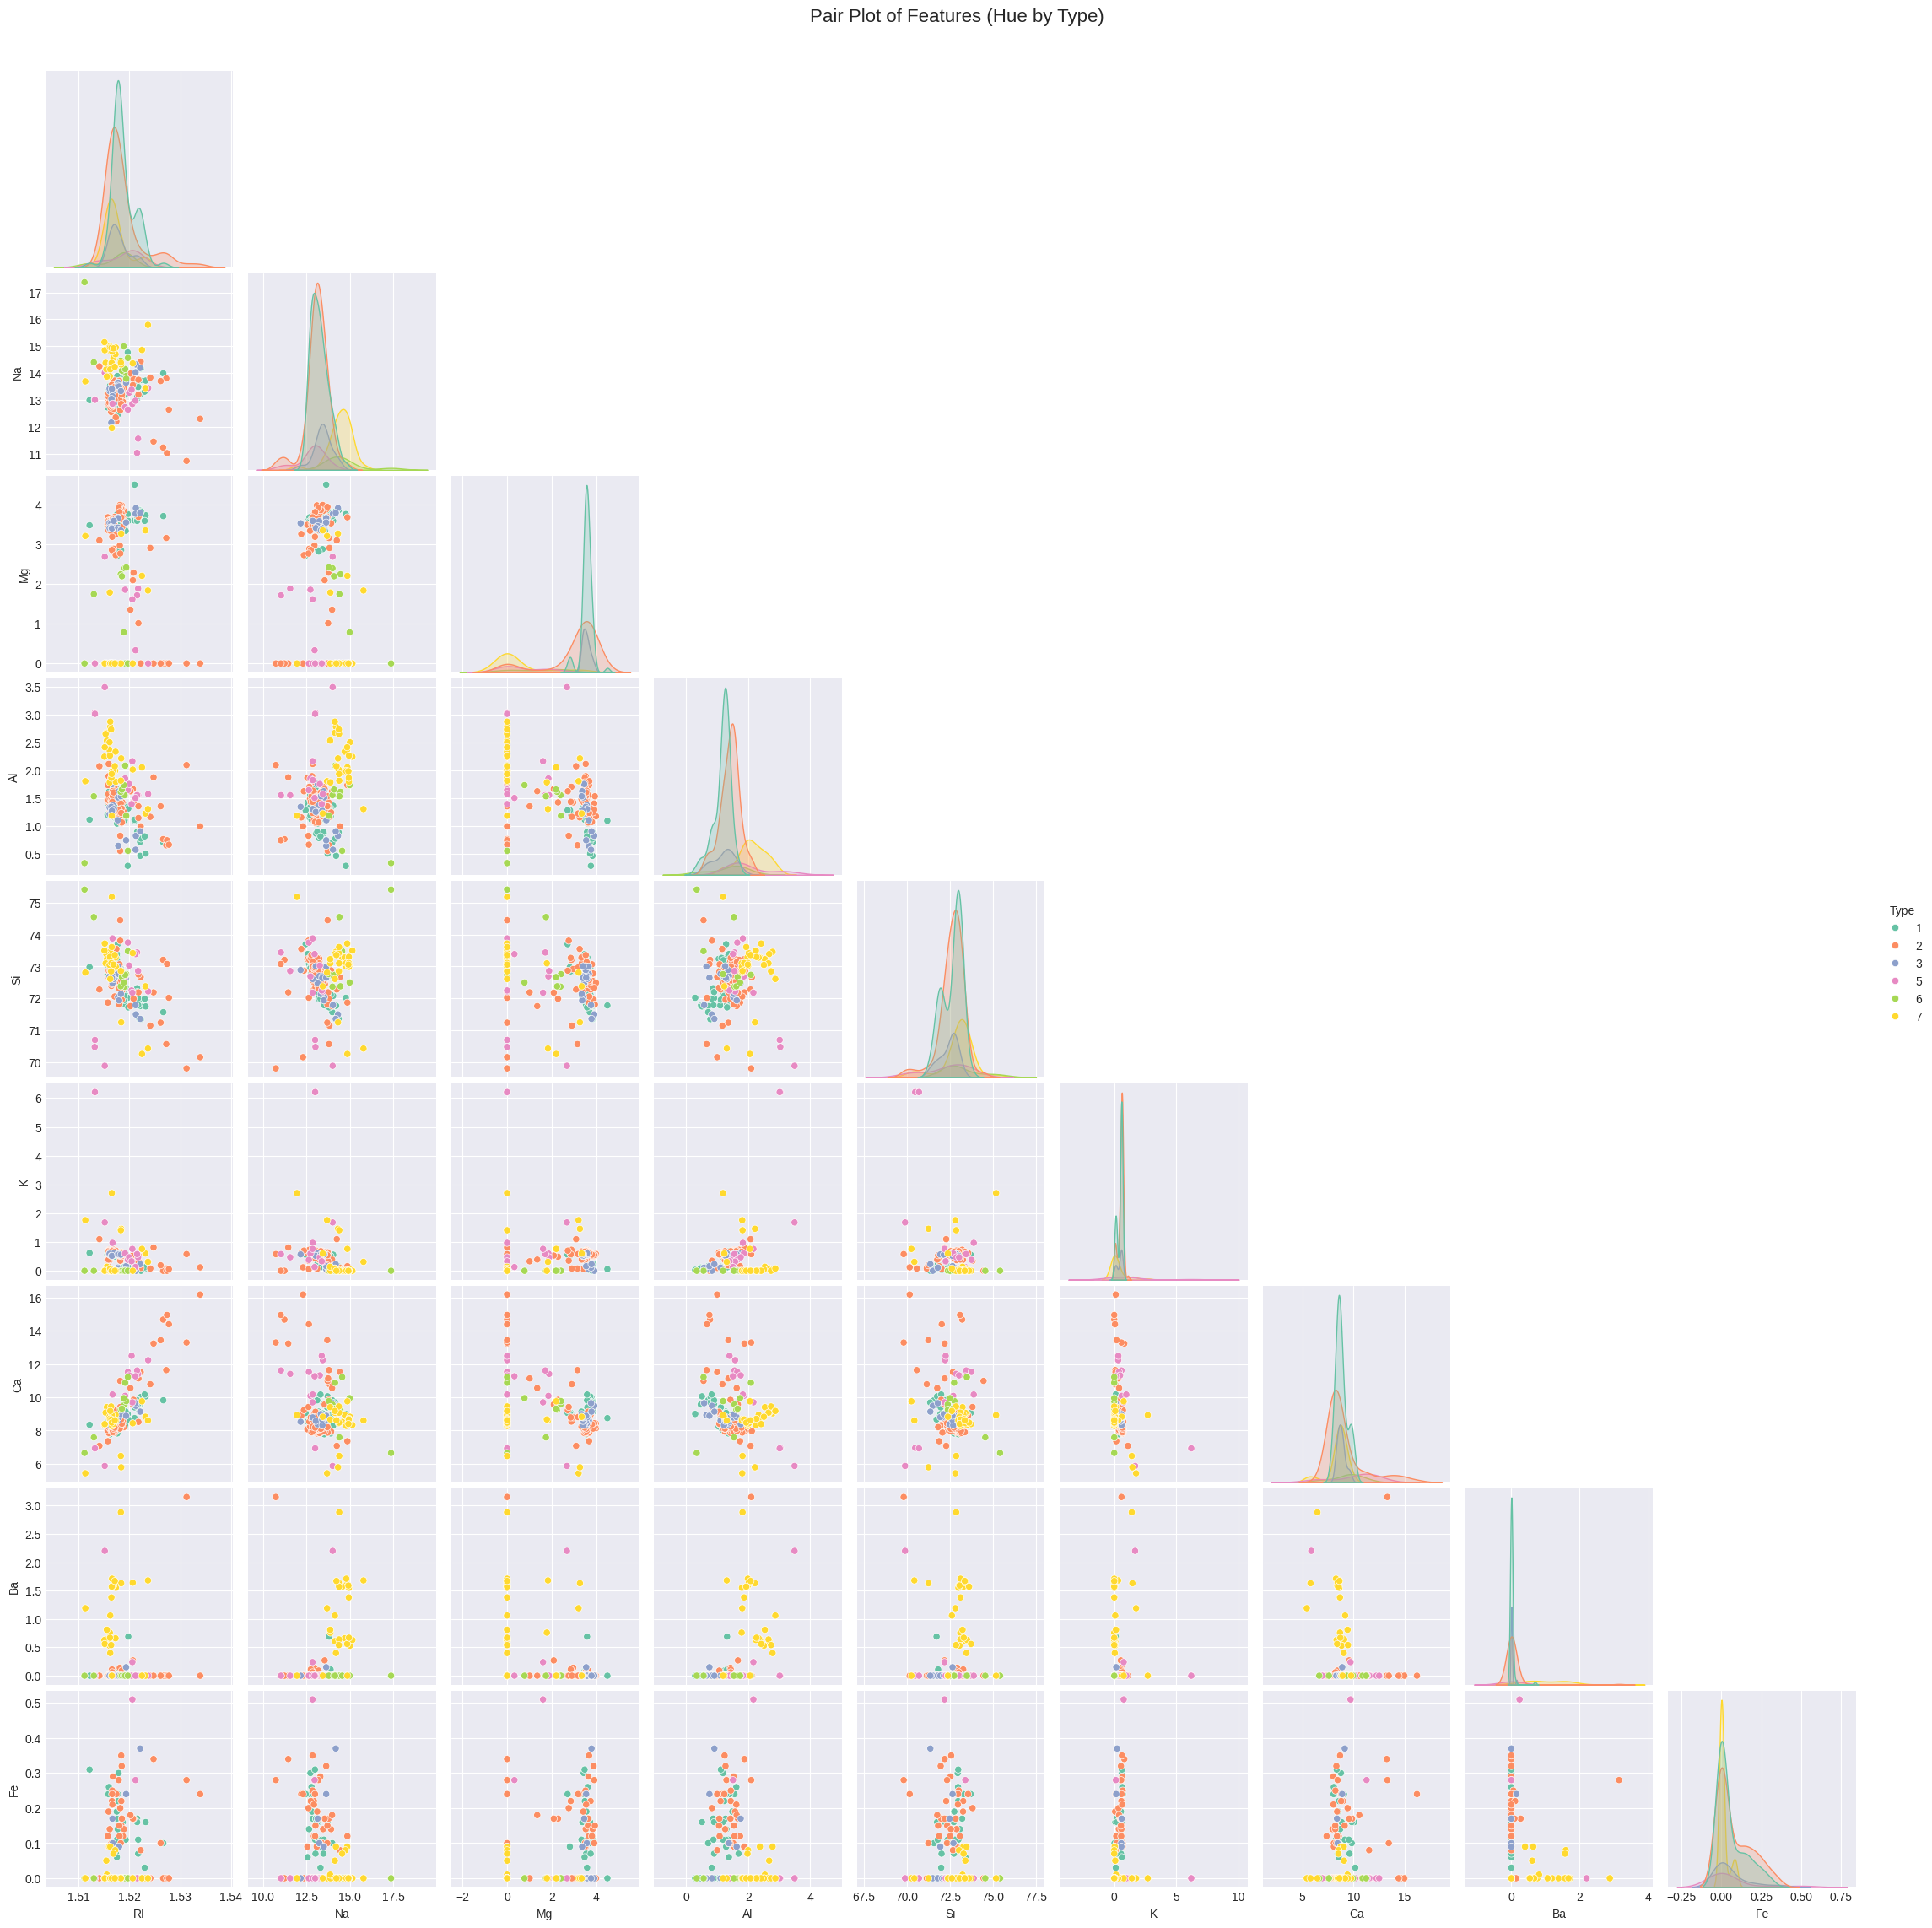

In [9]:
# Pairplot to visualize relationships between features and the target variable
def plot_pairplot(data):
    sns.pairplot(data, hue="Type", palette="Set2", diag_kind="kde", corner=True)
    plt.suptitle("Pair Plot of Features (Hue by Type)", y=1.02, fontsize=16)
    plt.show()
plot_pairplot(glass_data)

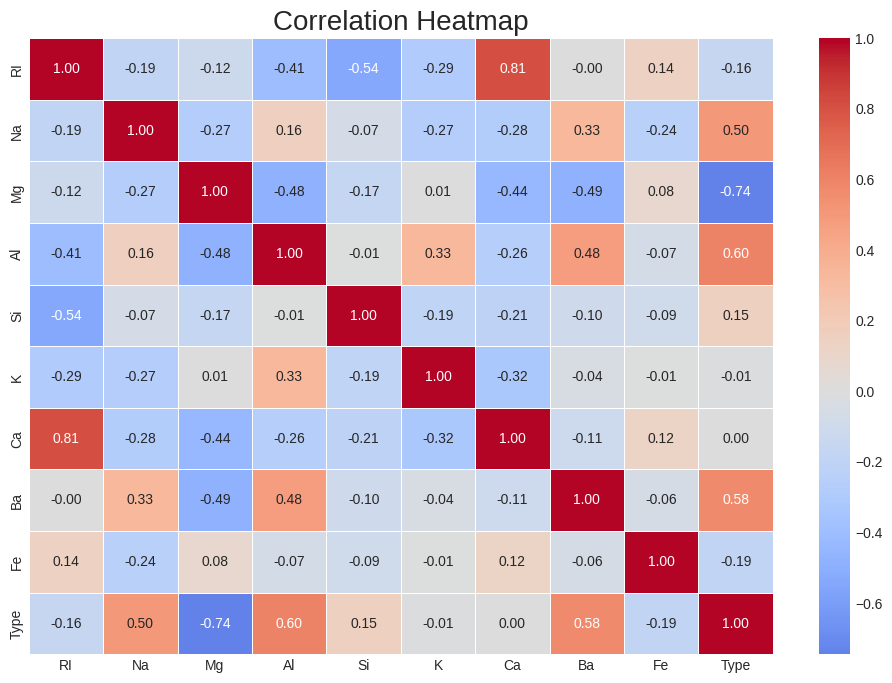

In [10]:
# Heatmap for the correlation matrix to analyze correlations between the features
def plot_heatmap(data):
    plt.figure(figsize=(12, 8))
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, center=0, fmt='.2f')
    plt.title("Correlation Heatmap", fontsize=20)
    plt.show()
plot_heatmap(glass_data)

In [11]:
def encode_categorical_columns(data):
    categorical_columns = data.select_dtypes(include=['object']).columns

    if len(categorical_columns) > 0:
        data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

    return data

# Call the function to encode categorical variables
glass_data_encoded = encode_categorical_columns(glass_data)

# Check for encoding
print("Data after encoding categorical columns:")
print(glass_data_encoded.head())

Data after encoding categorical columns:
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Applying scaling techniques
def scale_features(data, scaling_method="standardization"):
    # Select numerical columns
    numerical_columns = data.columns[:-1]  # Exclude the target column 'Type'

    if scaling_method == "standardization":
        # Standardization: (X - mean) / standard deviation
        scaler = StandardScaler()
    elif scaling_method == "normalization":
        # Normalization: Rescale values to a range of [0, 1]
        scaler = MinMaxScaler()

    # Fit and transform the numerical data
    data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

    return data

# Applying standardization on the dataset
glass_data_scaled = scale_features(glass_data_encoded.copy(), scaling_method="standardization")

# Display scaled data
print("Data after scaling:")
print(glass_data_scaled.head())

Data after scaling:
         RI        Na        Mg        Al        Si         K        Ca  \
0  0.872868  0.284953  1.254639 -0.692442 -1.127082 -0.671705 -0.145766   
1 -0.249333  0.591817  0.636168 -0.170460  0.102319 -0.026213 -0.793734   
2 -0.721318  0.149933  0.601422  0.190912  0.438787 -0.164533 -0.828949   
3 -0.232831 -0.242853  0.698710 -0.310994 -0.052974  0.112107 -0.519052   
4 -0.312045 -0.169205  0.650066 -0.411375  0.555256  0.081369 -0.624699   

         Ba        Fe  Type  
0 -0.352877 -0.586451     1  
1 -0.352877 -0.586451     1  
2 -0.352877 -0.586451     1  
3 -0.352877 -0.586451     1  
4 -0.352877 -0.586451     1  


In [13]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print("Class distribution before balancing:", Counter(glass_data_scaled['Type']))

# Separating features and target
X = glass_data_scaled.drop(columns=['Type'])
y = glass_data_scaled['Type']

# Applying SMOTE(Synthetic Minority Over-sampling Technique) for oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Checking class distribution after handling imbalance
print("Class distribution after SMOTE:", Counter(y_resampled))

# Recreating the resampled dataset
glass_data_balanced = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Type')], axis=1)

# Displaying the balanced dataset
print("Balanced dataset:")
print(glass_data_balanced.head())

Class distribution before balancing: Counter({2: 76, 1: 70, 7: 29, 3: 17, 5: 13, 6: 9})
Class distribution after SMOTE: Counter({1: 76, 2: 76, 3: 76, 5: 76, 6: 76, 7: 76})
Balanced dataset:
         RI        Na        Mg        Al        Si         K        Ca  \
0  0.872868  0.284953  1.254639 -0.692442 -1.127082 -0.671705 -0.145766   
1 -0.249333  0.591817  0.636168 -0.170460  0.102319 -0.026213 -0.793734   
2 -0.721318  0.149933  0.601422  0.190912  0.438787 -0.164533 -0.828949   
3 -0.232831 -0.242853  0.698710 -0.310994 -0.052974  0.112107 -0.519052   
4 -0.312045 -0.169205  0.650066 -0.411375  0.555256  0.081369 -0.624699   

         Ba        Fe  Type  
0 -0.352877 -0.586451     1  
1 -0.352877 -0.586451     1  
2 -0.352877 -0.586451     1  
3 -0.352877 -0.586451     1  
4 -0.352877 -0.586451     1  


In [14]:
from sklearn.model_selection import train_test_split

# Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Checking the size of the splits
print(f"Training data size: {X_train.shape[0]} rows")
print(f"Test data size: {X_test.shape[0]} rows")

Training data size: 171 rows
Test data size: 43 rows


In [15]:
from sklearn.ensemble import RandomForestClassifier

# Creating the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predicting on the test data
y_pred = rf_classifier.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculating precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Displaying individual class performance
classification_rep = classification_report(y_test, y_pred)

# Output the performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-score (weighted): {f1:.4f}")
print("\nDetailed Classification Report:\n", classification_rep)

Accuracy: 0.8140
Precision (weighted): 0.8262
Recall (weighted): 0.8140
F1-score (weighted): 0.8136

Detailed Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.85      0.73      0.79        15
           3       0.67      0.67      0.67         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.81        43
   macro avg       0.82      0.82      0.81        43
weighted avg       0.83      0.81      0.81        43



In [17]:
import numpy as np

# Getting feature importances from the trained Random Forest
feature_importances = rf_classifier.feature_importances_

# Sorting feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Printing the feature ranking
print("Feature ranking:")

for i in range(X.shape[1]):
    print(f"{i + 1}. {X.columns[indices[i]]}: {feature_importances[indices[i]]:.4f}")

Feature ranking:
1. Mg: 0.1740
2. Al: 0.1579
3. RI: 0.1283
4. Ca: 0.1263
5. Na: 0.1120
6. K: 0.0885
7. Si: 0.0856
8. Ba: 0.0849
9. Fe: 0.0425


In [18]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Bagging with Random Forest as estimator
bagging_classifier = BaggingClassifier(estimator=rf_classifier, n_estimators=50, random_state=42)

# Train the bagging classifier on the training data
bagging_classifier.fit(X_train, y_train)

# Predict using the bagging model
y_pred_bagging = bagging_classifier.predict(X_test)

# Evaluate the performance of the bagging model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')

print(f"Bagging Results:\nAccuracy: {accuracy_bagging:.4f}, Precision: {precision_bagging:.4f}, Recall: {recall_bagging:.4f}, F1-Score: {f1_bagging:.4f}")

Bagging Results:
Accuracy: 0.7907, Precision: 0.8159, Recall: 0.7907, F1-Score: 0.7853


In [19]:
from sklearn.ensemble import AdaBoostClassifier

# Creating AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)

# Training the AdaBoost model
adaboost_classifier.fit(X_train, y_train)

# Predicting on the test data
y_pred_adaboost = adaboost_classifier.predict(X_test)

# Evaluating AdaBoost performance
adaboost_accuracy = accuracy_score(y_test, y_pred_adaboost)
print(f"AdaBoost Accuracy: {adaboost_accuracy:.4f}")
print("AdaBoost Classification Report:")
print(classification_report(y_test, y_pred_adaboost))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.5349
AdaBoost Classification Report:
              precision    recall  f1-score   support

           1       0.54      0.93      0.68        14
           2       0.42      0.33      0.37        15
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.50      1.00      0.67         2
           7       1.00      0.50      0.67         6

    accuracy                           0.53        43
   macro avg       0.41      0.46      0.40        43
weighted avg       0.48      0.53      0.48        43



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
from sklearn.ensemble import GradientBoostingClassifier

# Creating Gradient Boosting Classifier
gradientboost_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Training the Gradient Boosting model
gradientboost_classifier.fit(X_train, y_train)

# Predicting on the test data
y_pred_gradientboost = gradientboost_classifier.predict(X_test)

# Evaluating Gradient Boosting performance
gradientboost_accuracy = accuracy_score(y_test, y_pred_gradientboost)
print(f"Gradient Boosting Accuracy: {gradientboost_accuracy:.4f}")
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gradientboost))

Gradient Boosting Accuracy: 0.8140
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.71      0.77        14
           2       0.81      0.87      0.84        15
           3       0.67      0.67      0.67         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       0.86      1.00      0.92         6

    accuracy                           0.81        43
   macro avg       0.81      0.82      0.80        43
weighted avg       0.82      0.81      0.81        43



In [22]:
# Comparing accuracies of all models
print(f"Bagging Accuracy: {accuracy_bagging:.4f}")
print(f"AdaBoost Accuracy: {adaboost_accuracy:.4f}")
print(f"Gradient Boosting Accuracy: {gradientboost_accuracy:.4f}")

Bagging Accuracy: 0.7907
AdaBoost Accuracy: 0.5349
Gradient Boosting Accuracy: 0.8140


*   The Bagging method yielded an accuracy of 79.07%, indicating that the ensemble of decision trees improved the model's performance by reducing variance and providing a relatively stable prediction.

*   AdaBoost, however, achieved an accuracy of only 53.49%, suggesting that it may not have effectively handled the data. This lower performance might be due to AdaBoost's sensitivity to noisy data or misclassified instances, which it heavily penalizes, potentially leading to poor generalization in this case.

*   Gradient Boosting performed the best, with an accuracy of 81.40%. Its sequential learning approach, where each tree corrects the mistakes of the previous ones, allowed it to create a strong model, making it the most effective technique for this dataset.




